# **E-commerce Furniture**

## **Import Libraries**


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


## **Load the Dataset**

In [66]:
df = pd.read_csv("D:/unified mentor projects/Ecommerce Furniture/ecommerce_furniture_dataset_2024.csv")


In [67]:
print(df.head())

                                        productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  


## **Data Cleaning & Preprocessing**

In [68]:
# Check for missing values
print(df.isnull().sum())

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64


In [69]:
# Remove $ sign and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['originalPrice'] = df['originalPrice'].replace('[\$,]', '', regex=True)
df['originalPrice'] = pd.to_numeric(df['originalPrice'], errors='coerce')

# Drop missing values for key columns
df = df.dropna(subset=['price', 'sold'])

# Clean tagText: replace rare tags with 'others'
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

# Label encode tagText
le = LabelEncoder()
df['tagText'] = le.fit_transform(df['tagText'])

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\PRATIK\AppData\Local\Temp\ipykernel_19848\2433072450.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\PRATIK\AppData\Local\Temp\ipykernel_19848\2433072450.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['originalPrice'] = df['originalPrice'].replace('[\$,]', '', regex=True)


## **Feature Engineering**

In [70]:
# Calculate discount %
df['discount_percentage'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100
df['discount_percentage'] = df['discount_percentage'].replace([np.inf, -np.inf], np.nan).fillna(0)

# TF-IDF on productTitle
df['productTitle'] = df['productTitle'].fillna("")
tfidf = TfidfVectorizer(max_features=100)
productTitle_tfidf = tfidf.fit_transform(df['productTitle'])

# Combine TF-IDF with main df
productTitle_tfidf_df = pd.DataFrame(productTitle_tfidf.toarray(), columns=tfidf.get_feature_names_out())
df = pd.concat([df.reset_index(drop=True), productTitle_tfidf_df.reset_index(drop=True)], axis=1)
df.drop('productTitle', axis=1, inplace=True)

## **Visualization**

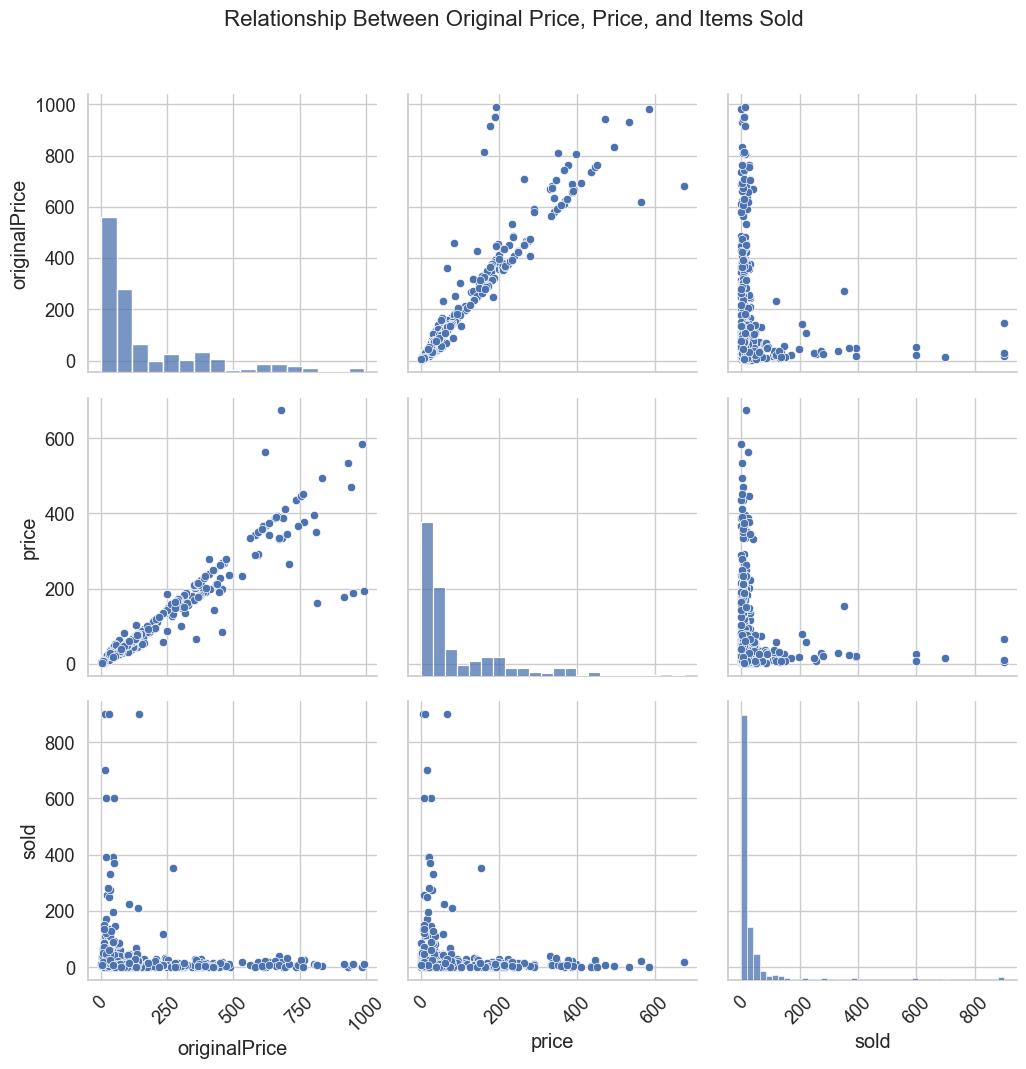

In [71]:
# Filter extreme outliers for better plotting
df_viz = df[(df['price'] < 1000) & (df['originalPrice'] < 1000) & (df['sold'] < 1000)]

# Plot pairplot
sns.set(style='whitegrid')
sns.set_context("notebook", font_scale=1.2)
pair_plot = sns.pairplot(df_viz, vars=['originalPrice', 'price', 'sold'], kind='scatter', height=3.5)
pair_plot.fig.suptitle('Relationship Between Original Price, Price, and Items Sold', fontsize=16, y=1.02)
for ax in pair_plot.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()

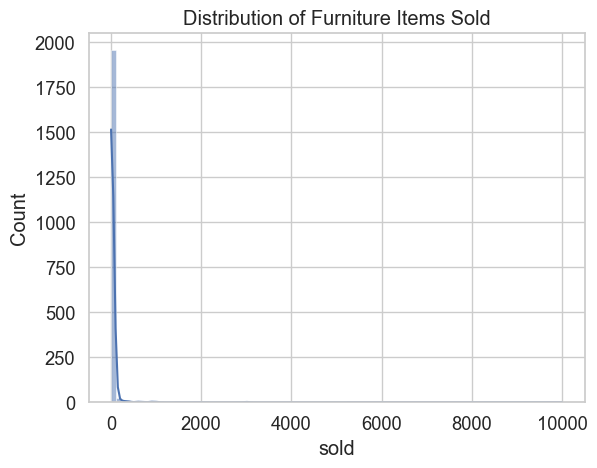

In [72]:
# Distribution of 'sold' values
sns.histplot(df['sold'], kde=True)
plt.title('Distribution of Furniture Items Sold')
plt.show()

## **Model Selection & Training**

In [73]:
# Drop any remaining NaNs
df.dropna(inplace=True)

# Split data
X = df.drop('sold', axis=1)
y = df['sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## **Model Evaluation**

In [75]:
# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Results
print(f"\nLinear Regression:\n MSE = {mse_lr:.2f}, R2 = {r2_lr:.2f}")
print(f"\nRandom Forest:\n MSE = {mse_rf:.2f}, R2 = {r2_rf:.2f}")


Linear Regression:
 MSE = 166747.93, R2 = -0.21

Random Forest:
 MSE = 63706.02, R2 = 0.54
